In [179]:
import seaborn as sns
import json
import pandas as pd
from matplotlib import pyplot as plt

In [180]:
import os
os.getcwd()

'/workspaces/duckietown-irl/eval_results'

In [181]:
# load data
map = ""
results = pd.DataFrame()
for exp in ('partial_irl', 'full_irl', 'rl_velocity', 'rl_human'):
    for seed in range(3):
        try:
            with open(f"./{'/'.join([map,exp,str(seed),'total_metrics.json'])}") as f:
                print(f.name)
                data = pd.DataFrame.from_dict(json.load(f))
                data = data.drop(columns=['episode_totals'])
                data['seed'] = seed
                
                data['exp'] = exp
                results = pd.concat([results, data])
                print(results)
        except FileNotFoundError:
            print(f"File not found: .{'/'.join([map,exp,str(seed),'total_metrics.json'])}")
            pass

.//partial_irl/0/total_metrics.json
                              median_totals  mean_totals  stdev_totals  seed  \
deviation-heading                  5.435690     5.096752      4.038150     0   
in-drivable-lane                   1.033333     8.520000     17.418003     0   
deviation-center-line              3.158072     2.905059      2.343459     0   
driving-distance                  33.442123    22.022976     15.458524     0   
driving-distance-consecutive      26.468633    19.706836     15.185199     0   
survival_time                     66.600000    47.046667     29.225165     0   
distance-from-start                1.332710     1.146469      0.522173     0   

                                      exp  
deviation-heading             partial_irl  
in-drivable-lane              partial_irl  
deviation-center-line         partial_irl  
driving-distance              partial_irl  
driving-distance-consecutive  partial_irl  
survival_time                 partial_irl  
distance-from-s

In [182]:
results.loc['deviation-heading']

,median_totals,mean_totals,stdev_totals,seed,exp
deviation-heading,5.435690,5.096752,4.038150,0,partial_irl
deviation-heading,4.835792,3.897372,3.722084,1,partial_irl
deviation-heading,5.725045,5.113301,3.447005,2,partial_irl
deviation-heading,15.281431,16.557597,12.157468,0,full_irl
deviation-heading,12.459974,15.067566,11.896358,1,full_irl
deviation-heading,9.416044,18.128701,21.313487,2,full_irl
deviation-heading,2.338301,3.983267,3.760635,0,rl_velocity
deviation-heading,0.968255,3.165049,3.236410,2,rl_velocity
deviation-heading,11.995636,12.345205,5.906520,0,rl_human
deviation-heading,12.025942,13.306569,8.526420,1,rl_human


In [183]:
results['exp'] = results['exp'].str.replace('_', ' ').str.title()
results['exp'] = results['exp'].str.replace('Irl', 'IRL').str.replace("Partial IRL", "Simple ICRL")

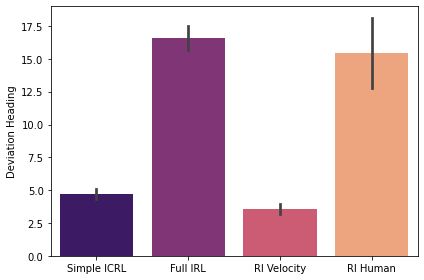

In [184]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('xkcd:white')
sns.barplot(data=results.loc['deviation-heading'], x='exp', y='mean_totals', errorbar='se', palette='magma', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel('Deviation Heading')
plt.tight_layout()
plt.savefig(f"plts/{map}/deviation_heading.png", bbox_inches='tight')

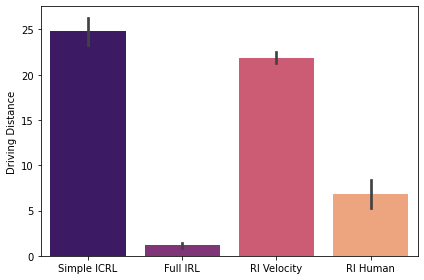

In [185]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('xkcd:white')
sns.barplot(data=results.loc['driving-distance'], x='exp', y='mean_totals', errorbar='se', palette='magma')
ax.set_xlabel(None)
ax.set_ylabel('Driving Distance')
plt.tight_layout()
plt.savefig(f"plts/{map}/distance_traveled.png")

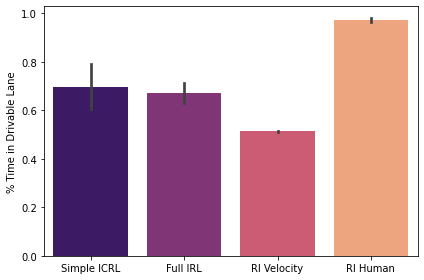

In [186]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('xkcd:white')
sns.barplot(data=(1-results.loc['in-drivable-lane'].set_index(["seed", "exp"])/results.loc['survival_time'].set_index(["seed", "exp"])).reset_index(drop=False), x='exp', y='mean_totals', errorbar='se', palette='magma')
ax.set_xlabel(None)
ax.set_ylabel('% Time in Drivable Lane')
plt.tight_layout()
plt.savefig(f"plts/{map}/time_in_lane.png")